In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import os

PROJECT_ROOT = Path(r"C:\Develop\Python\PyCharmProjects\iu_computer_vision")
assert (PROJECT_ROOT/"analysis").exists(), f"Falscher PROJECT_ROOT: {PROJECT_ROOT}"
os.chdir(PROJECT_ROOT)
print("CWD:", Path.cwd())


CWD: C:\Develop\Python\PyCharmProjects\iu_computer_vision


In [ ]:
MODEL_PATH = PROJECT_ROOT/"analysis/models/best_windows_gtsdb_40ep_pretrained_gtsrb.pt"
VIDEO_PATH = PROJECT_ROOT/"analysis/videos/altendorf_zweiter_tag.mp4"
OUT_DIR    = PROJECT_ROOT/"analysis/videos/output"
OUT_DIR.mkdir(parents=True, exist_ok=True)
print(MODEL_PATH.exists(), VIDEO_PATH.exists(), OUT_DIR)


True True C:\Develop\Python\PyCharmProjects\iu_computer_vision\analysis\notebooks\v11_video_eval


In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import display, clear_output
from PIL import Image

model = YOLO(str(MODEL_PATH))

CLASS_NAMES = ["Speed limit (20km/h)","Speed limit (30km/h)","Speed limit (50km/h)","Speed limit (60km/h)","Speed limit (70km/h)","Speed limit (80km/h)",
"End of speed limit (80km/h)","Speed limit (100km/h)","Speed limit (120km/h)","No passing","No passing for vehicles over 3.5 metric tons",
"Right-of-way at the next intersection","Priority road","Yield","Stop","No vehicles","Vehicles over 3.5 metric tons prohibited","No entry",
"General caution","Dangerous curve to the left","Dangerous curve to the right","Double curve","Bumpy road","Slippery road","Road narrows on the right",
"Road work","Traffic signals","Pedestrians","Children crossing","Bicycles crossing","Beware of ice/snow","Wild animals crossing",
"End of all speed and passing limits","Turn right ahead","Turn left ahead","Ahead only","Go straight or right","Go straight or left","Keep right",
"Keep left","Roundabout mandatory","End of no passing","End of no passing by vehicles over 3.5 metric tons"]


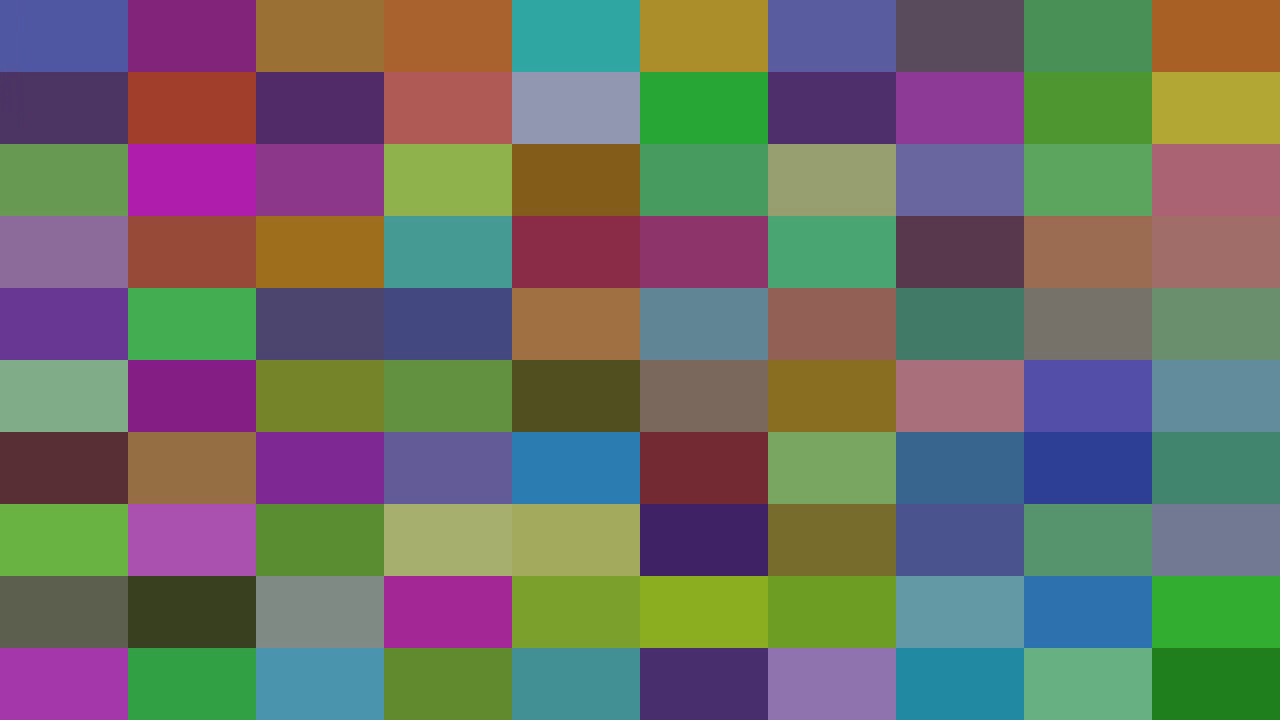

Speed: 4.2ms preprocess, 57.3ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)


Gespeichert: C:\Develop\Python\PyCharmProjects\iu_computer_vision\analysis\notebooks\v11_video_eval\stream_preview_labeled.mp4


In [ ]:
writer = None
out_path = OUT_DIR / "stream_preview_labeled.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

for r in model(source=str(VIDEO_PATH), stream=True, conf=0.25, imgsz=512, device="cpu", vid_stride=1):
    im = r.orig_img.copy()
    b = r.boxes
    if b is not None and len(b):
        xyxy = b.xyxy.cpu().numpy().astype(int)
        cls_ids = b.cls.cpu().numpy().astype(int)
        for (x1, y1, x2, y2), cid in zip(xyxy, cls_ids):
            label = CLASS_NAMES[cid] if 0 <= cid < len(CLASS_NAMES) else f"id_{cid}"
            cv2.rectangle(im, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(im, label, (x1, max(0, y1 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    if writer is None:
        h, w = im.shape[:2]
        OUT_DIR.mkdir(parents=True, exist_ok=True)
        writer = cv2.VideoWriter(str(out_path), fourcc, 30, (w, h))

    writer.write(im)
    clear_output(wait=True)
    display(Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)))

if writer: writer.release()
print("Gespeichert:", out_path)


In [ ]:
try:
    writer.release()
except Exception:
    pass
print("Fertig.")


Fertig.
